In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [365]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
data['hour'] = pd.to_datetime(data['date_time']).dt.hour
data['holiday'] = data['holiday'].apply(lambda x: 0 if x == 'None' else 1)

# isolating onle 4 columns (hour, temp, holiday, traffic_volume)
df = data[['hour', 'temp', 'holiday', 'traffic_volume']]
#Creating Correlation Matrix
corr = df.corr()
#Visualize Correlations

# Features and target
X = data[['hour', 'temp', 'holiday']]
y = data['traffic_volume']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Streamlit app
st.title("Traffic Volume Predictor")
st.write("This dashboard predicts traffic volume based on time, temperature, and holiday status.")

# Inputs
hour = st.slider("Select Hour of the Day", 0, 23, step=1)
temp = st.number_input("Enter Temperature (°C)", value=20.0)
holiday = st.selectbox("Is it a Holiday?", ["No", "Yes"])
holiday = 1 if holiday == "Yes" else 0

# Prediction
if st.button("Predict Traffic Volume"):
    prediction = model.predict([[hour, temp, holiday]])
    st.success(f"Predicted Traffic Volume: {int(prediction[0])}")

# Optional Visualization
st.write("### Insights from the Dataset")
st.bar_chart(data.groupby('hour')['traffic_volume'].mean())


2024-11-24 14:31:38.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.626 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.628 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [366]:
y_pred = model.predict(X_test)

st.write("~ Scatter Plots: Relationships with Traffic Volume ~")

fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(x=df['holiday'], y=df['traffic_volume'], ax=ax)
ax.set_title('Traffic Volume on Holidays vs Non-Holidays')
st.pyplot(fig)

# Scatter plot for 'hour' vs 'traffic_volume'
fig, ax = plt.subplots()
sns.scatterplot(x=df['hour'], y=df['traffic_volume'], ax=ax)
ax.set_title('Traffic Volume vs Hour')
st.pyplot(fig)

# Scatter plot for 'temp' vs 'traffic_volume'
fig, ax = plt.subplots()
sns.scatterplot(x=df['temp'], y=df['traffic_volume'], ax=ax)
ax.set_title('Traffic Volume vs Temperature')
st.pyplot(fig)
fig, ax = plt.subplots()




2024-11-24 14:31:38.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.884 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:38.884 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:39.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:39.130 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:39.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-24 14:31:39.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

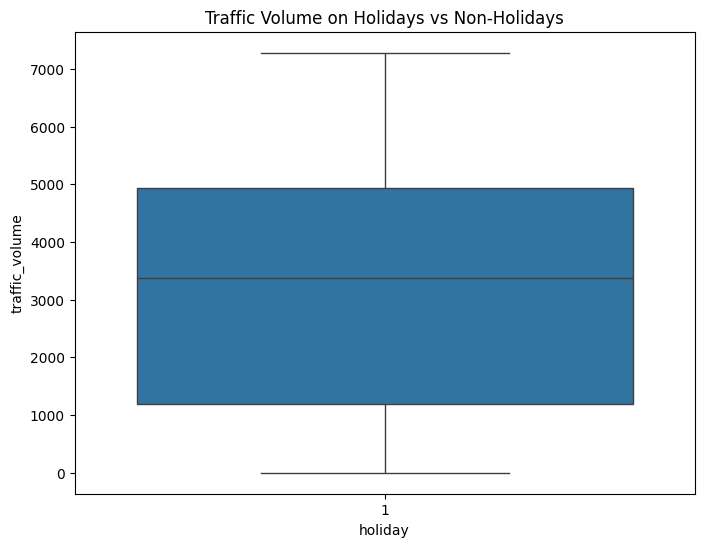

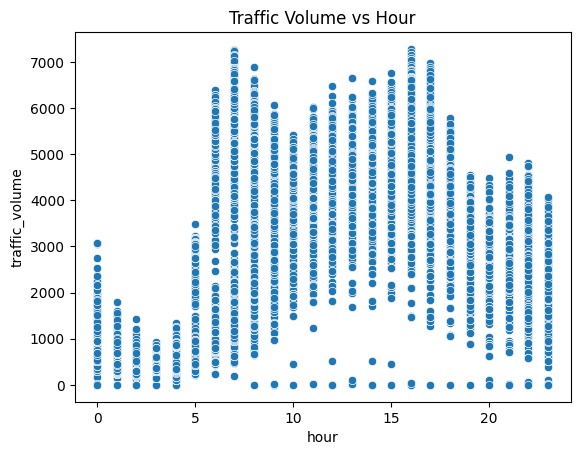

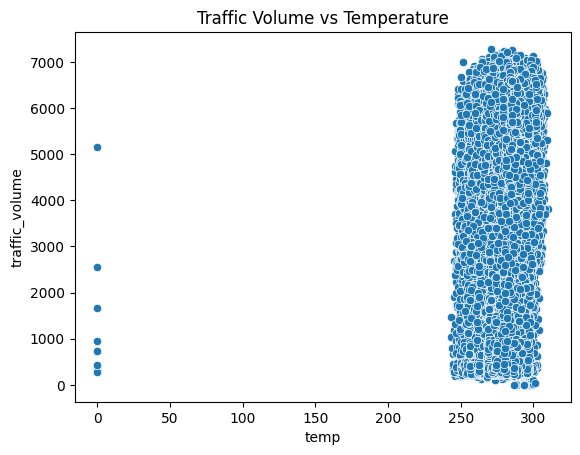

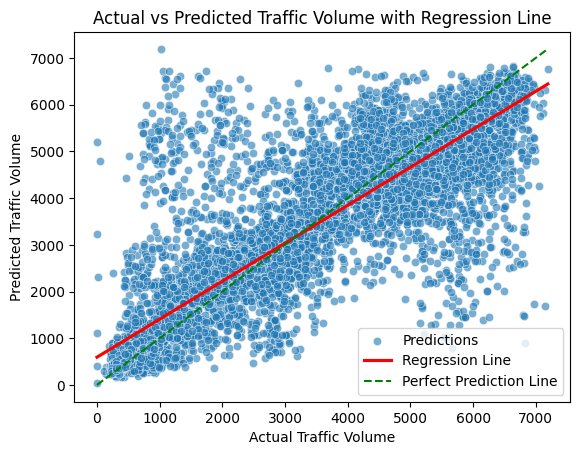

In [367]:

# Scatter points
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Predictions')

# Add regression line (fitted line based on predictions)
sns.regplot(x=y_test, y=y_pred, scatter=False, ci=None, color='red', label='Regression Line')

# Add perfect prediction line
max_val = max(max(y_test), max(y_pred))  # For axis limits
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect Prediction Line')

# Plot settings
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume with Regression Line')
plt.legend()

plt.show()
